# Evaluación de modelos (ejercicio)

### **Importante: comentar adecuadamente cada paso realizado**, relacionándolo con lo visto en la teoría.

Para este ejercicio usaremos de nuevo los datos de cáncer de mama que están accesibles en scikit-learn.

In [1]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

## Parte 1: validación cruzada estratificada

Se pide implementar una funcion `mi_cross_val_f1` que aplique validación cruzada con $k$ particiones estratificadas, y que use **$F_1$ como métrica**. Similar a la función `cross_val_score`, pero específicamente con particiones estratificadas y métrica $F_1$, **y obviamente sin usar `cross_val_score`**.  

En concreto, la función debe tener los siguientes argumentos de entrada, `mi_cross_val_f1`*(modelo,X,y,n_splits=5,clase_positiva=1)*, donde:

- *modelo* es un un clasificador (en particular, un objeto de una clase que tenga métodos `fit` y `predict`).
- *X* es un array con los datos.
- *y* es un array con la clasificación (binaria) de los datos anteriores.
- *n_splits* es el número de particiones en la validación cruzada. Por defecto es 5.
- *clase_positiva* la clase que se ha considerar como positiva cuando se calcule la métrica $F_1$. Por defecto es 1. Nótese que al calcular la métrica $F_1$ debemos saber qué clase es la que se considera como positiva.  

Debe devolver una lista o array con *n_splits* números, los resultados de las *n_splits* evaluaciones de la métrica $F_1$ que se realizan al aplicar validación cruzada con *n_splits* particiones estratificadas. 

**Nota**: no se puede usar `cross_val_score`, pero se debe usar `f1_score`y la clase `StratifiedKFold` (consultar la documentación de ambas)

**Ejemplos**:

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=0)

from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(solver="liblinear")


# mi_cross_val_f1(logreg,X_train,y_train) devuelve:

#[0.9629629629629629,
# 0.9541284403669724,
# 0.9320388349514563,
# 0.9814814814814815,
# 0.9724770642201834]

# mi_cross_val_f1(logreg,X_train,y_train,n_splits=10) devuelve:

#[0.9818181818181818,
# 0.9433962264150944,
# 0.9433962264150944,
# 0.9642857142857143,
# 0.9433962264150944,
# 0.9629629629629629,
# 0.9818181818181818,
# 0.9811320754716981,
# 0.9811320754716981,
# 0.962962962962963]

# mi_cross_val_f1(logreg,X_train,y_train,n_splits=10,clase=0)

#[0.967741935483871,
# 0.9090909090909091,
# 0.9090909090909091,
# 0.9333333333333333,
# 0.9090909090909091,
# 0.9375,
# 0.967741935483871,
# 0.967741935483871,
# 0.967741935483871,
# 0.9285714285714286]

Lo que vamos a hacer aquí es usando StratifiedKFold obtener varios conjuntos y comprobar para cada modelo creado el score f1, conforme los vamos obteniendo los guardaremos en una lista que será lo que devuelva el método.

Lo que quiero encontrar aquí es el modelo que mejor score F1 obtiene,para luego con este modelo encontrar los mejores hiperparámetros y evaluar este modelo

In [3]:
# Definr aquí mi_cross_val_f1
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
# Modelo, conjunto
def mi_cross_val_f1(model,X,y,n_splits=5,clase=1):
    f1_list=[]
    
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True)
    
    # Recorremos cada conjunto
    for i_train, i_test in skf.split(X,y):
        
        # Definmos el conjunto X
        X_train =X[i_train]
        X_test =X[i_test]
        
        # Las validaciones de train y test
        y_train =y[i_train]
        y_test =y[i_test]
        
        #Entrenamos el modelo
        model_copy=model
        model_copy.fit(X_train,y_train)
        
        # calculamos las predicciones
        y_pred= model_copy.predict(X_test)
        
        # calculamos el valor f1 pasandola las predicciones con la clase
        f1_i = f1_score(y_test, y_pred, pos_label=clase)
        # Finalmente lo añadimos a la lista
        f1_list.append(f1_i)
    
    
    
    return f1_list

Aquí simplemente hago unas comprobaciones como las del comentario para ver que las soluciones son iguales

In [4]:
mi_cross_val_f1(logreg,X_train,y_train) 

[0.9811320754716981,
 0.9310344827586207,
 0.9811320754716981,
 0.9615384615384616,
 0.9532710280373832]

In [5]:
mi_cross_val_f1(logreg,X_train,y_train,n_splits=10)

[0.9473684210526316,
 0.9629629629629629,
 1.0,
 0.9629629629629629,
 0.9629629629629629,
 0.9642857142857143,
 0.9818181818181818,
 0.9411764705882353,
 0.9615384615384616,
 0.9811320754716981]

In [6]:
mi_cross_val_f1(logreg,X_train,y_train,n_splits=10,clase=0)

[0.967741935483871,
 0.9375,
 0.9333333333333333,
 0.9090909090909091,
 1.0,
 0.9411764705882353,
 0.896551724137931,
 0.9333333333333333,
 0.9090909090909091,
 0.9333333333333333]

Se puede comprobar que los tres ejemplos anteriores efectivamente coinciden con lo que devuelve `cross_val_score`:

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer,f1_score

In [8]:
cross_val_score(logreg,X_train,y_train,scoring=make_scorer(f1_score),cv=5)

array([0.96296296, 0.96296296, 0.91428571, 0.98148148, 0.97247706])

In [9]:
cross_val_score(logreg,X_train,y_train,scoring=make_scorer(f1_score),cv=10)

array([0.98181818, 0.94339623, 0.94339623, 0.96428571, 0.94339623,
       0.96296296, 0.98181818, 0.98113208, 0.98113208, 0.96296296])

In [10]:
cross_val_score(logreg,X_train,y_train,scoring=make_scorer(f1_score,pos_label=0),cv=10)

array([0.96774194, 0.90909091, 0.90909091, 0.93333333, 0.90909091,
       0.9375    , 0.96551724, 0.96774194, 0.96774194, 0.93333333])

## Parte 2: evaluación de modelos para datos del cáncer de mama

En esta parte supondremos que queremos encontrar un buen modelo para clasificación en el caso del cáncer de mama. Nos restingiremos a dos familias de clasificadores:

1. **SGDClassifier** con *loss="log"*. Es decir, regresión logística mediante descenso por el gradiente. 
2. **SVC**, máquina de vectores soporte con kernels.

En los datos del cáncer de mama, la clase 0 se corresponde con *maligno* y la clase 1 se corresponde con *benigno*. Supondremos también en esta sección que estamos interesado principalmente en el rendimiento sobre la detección del cáncer. Es decir, consideremos *maligno* como la clase positiva.

**Nota importante**: la clase positiva por defecto en scikit-learn es 1, y en este caso queremos considerar la clase 0 como la positiva. Para ello tenemos dos opciones:

- Usar el parámetro `pos_label` en las distintas funciones que usemos.
- Hacer una transformación inicial de las clases, para poner el 1 como 0 y el 0 como 1. Eso se consigue fácilmente haciendo `1-cancer.target`

Antes de hacer ninguna comprobación, vamos a realizar la transformación sobre el conjunto

In [11]:
# COmo indica el apartado realizo una transformación intercambiando los valores
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, 1 - cancer.target, stratify=cancer.target, random_state=0)

### 2.1 *Grid Search* con validación cruzada



Aplicar `GridSearchCV` para ajustar hiperparámetros de los modelos `SGDClassifier`y `SVC`, aplicados al conjunto de datos del cáncer de mama.  En lugar de tratar de optimizar la tasa de aciertos, tratar de optimizar la métrica $F_1$ calculada considerando que los ejemplos de tumor "maligno" son los positivos. 

Tratar de encontrar valores optimos solo para aquellos hiperparámetos del modelo que te sean familiares y para valores de los que conozcas el significado. Probar con distintas rejillas. 

Una vez ajustados los dos modelos, dar para ambos:

- La tasa de aciertos, tanto en el conjunto de entrenamiento como en el de prueba.
- Matriz de confusión, tanto en entrenamiento como en prueba.
- *Classification report*, tanto para entrenamiento como para prueba. 

Interpretar los resultados. 


### <center> SDGClassifier </center>

Para el SDGClassifier vamos a comprobar los parámetros:
* alpha: Para penalizar los pesos y controlar la regularización, es un valor que cuanto más grande más fuerte será la regularización
* penalty: Que es la penalización L1 ó L2
* Max iter: QUe son las iteraciones máxima que dará el modelo

In [12]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

param_grid_sgd = {'alpha': [0.001, 0.01, 0.1, 1,10],'penalty': ['l1','l2'],'max_iter': [1000, 2000, 3000]}
sgd_classifier = SGDClassifier(loss='log', random_state=0)

grid_search_sdg = GridSearchCV(sgd_classifier, param_grid_sgd, cv=5,return_train_score=True,scoring='f1') # Se necesita par evitar warnings a partir de la 0.21
#
grid_search_sdg.fit(X_train, y_train)

C:\Users\alarc\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\alarc\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\alarc\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\alarc\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\alarc\anaconda3\Lib\sit

C:\Users\alarc\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\alarc\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\alarc\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\alarc\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\alarc\anaconda3\Lib\sit

C:\Users\alarc\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\alarc\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\alarc\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\alarc\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\alarc\anaconda3\Lib\sit

C:\Users\alarc\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\alarc\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\alarc\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\alarc\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\alarc\anaconda3\Lib\site-packa

GridSearchCV(cv=5, estimator=SGDClassifier(loss='log', random_state=0),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10],
                         'max_iter': [1000, 2000, 3000],
                         'penalty': ['l1', 'l2']},
             return_train_score=True, scoring='f1')

Una vez obtenidos los resultados podemos guardar los resultados mejores en una variable gracias a best_params

In [13]:
best_params_sdg = grid_search_sdg.best_params_
best_params_sdg

{'alpha': 0.001, 'max_iter': 1000, 'penalty': 'l1'}

### <center> SVC </center>

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

Ahora vamos a realizar lo mismo pero para SVC, en el caso de SVC, como parámetros a buscar el mejor valor para:
* C: Este valor indica el peso que le damos a la hora de clasificar, un valor de coste mayor implicaría un mayor peso de una observación y el SVM sería más estricto
* Gamma: Un valor de gamma alto puede provocar sobreajuste y aumentar el tiempo de computación, mientrás que un valor más pequeño son modelos mas rápidos y con menos sobreajuste
* Max_iter: Número de iteraciones máximas que dará el modelo

In [15]:
# Definimos los parámetros y entrenamos el modelo
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],'gamma': [0.001, 0.01, 0.1, 1, 10, 100],'max_iter': [1000, 2000, 3000]}

svc_classifier = SVC(probability=True, random_state=0)

grid_search_svc = GridSearchCV(SVC(), param_grid, cv=5,return_train_score=True,scoring='f1') # Se necesita par evitar warnings a partir de la 0.21

grid_search_svc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [1000, 2000, 3000]},
             return_train_score=True, scoring='f1')

In [16]:
# Nos quedamos con los mejores hiperparámetros
best_params_svc = grid_search_svc.best_params_
best_params_svc

{'C': 1, 'gamma': 0.001, 'max_iter': 1000}

### Una vez hemos conseguido los mejores parámetros,vamos a calcular la tasa de acierto, matriz de confusión y el report con estos hiperparámetros

Para los mejores parámetros obtenidos vamos a quedarnos con ese modelo para calcular la tasa, matriz y report

In [17]:
# Los mejores modelos
best_svc_model = SVC(**best_params_svc, probability=True, random_state=0)

#entrenamos
best_svc_model.fit(X_train, y_train)

# Hacemos las predicciones en el conjunto de prueba y test
svc_test_predictions = best_svc_model.predict(X_test)
svc_train_predictions = best_svc_model.predict(X_train)



In [18]:
best_sdg_model = SGDClassifier(**best_params_sdg, loss='log', random_state=0)
#entrenamos
best_sdg_model.fit(X_train, y_train)
# hacemos las predicciones con el mejor modelo
sgd_test_predictions = best_sdg_model.predict(X_test)
sgd_train_predictions = best_sdg_model.predict(X_train)

C:\Users\alarc\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


### Tasa de aciertos

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Calculamos la tasa de aciertos con SGD, pasandole el conjunto y las predicciones de entrenamiento y prueba
sgd_train_accuracy = accuracy_score(y_train, sgd_train_predictions)
sgd_test_accuracy = accuracy_score(y_test, sgd_test_predictions)

# Calculamos la tasa de aciertos con SVC, pasandole el conjunto y las predicciones de entrenamiento y prueba
svc_train_accuracy = accuracy_score(y_train, svc_train_predictions)
svc_test_accuracy = accuracy_score(y_test, svc_test_predictions)

# Mostramos las tasas de aciertos para ambos casos en entrenamiento y prueba
print(f"Tasa de aciertos para SGD para entrenamiento: {sgd_train_accuracy}")
print(f"Tasa de aciertos para SGD para prueba: {sgd_test_accuracy}")
print()
print(f"Tasa de aciertos para SVC para entrenamiento: {svc_train_accuracy}")
print(f"Tasa de aciertos para SVC para prueba: {svc_test_accuracy}")

Tasa de aciertos para SGD para entrenamiento: 0.9178403755868545
Tasa de aciertos para SGD para prueba: 0.916083916083916

Tasa de aciertos para SVC para entrenamiento: 0.9812206572769953
Tasa de aciertos para SVC para prueba: 0.9090909090909091


Los resultados son muy similares, pero podemos decir que hay un sobreajuste en el modelo SVC ya que se puede ver que en el entrenamiento obtiene un rendimiento mayor(98) frente al del test (91). Mientrás que  en SDG el rendimiento de entrenamiento y prueba es prácticamente el mismo , por lo que no presenta sobreajuste

### Matriz de confusion

Para obtener la matriz de confusión simplemente tenemos que pasarle el conjunto y con las clasificaciones, seguido del conjunto del modelo creado, este nos devolverá una matriz que contendra (de arriba a la izq a abajo a la derecha):

* TN: Negativos clasificados como negativos

* FP: Falsos positivos (Que son negativos)

* FN: Falsos negativos (Que son positivos)

* TP: Positivos clasificados como positivos


In [20]:
from sklearn.metrics import confusion_matrix

# Matriz del conjunto de entrenamiento
confusion = confusion_matrix(y_train, sgd_train_predictions)
print("Confusion matrix SDG-train:\n{}".format(confusion))

# Matriz del conjunto de prueba
confusion = confusion_matrix(y_test, sgd_test_predictions)
print("Confusion matrix SDG-test:\n{}".format(confusion))

Confusion matrix SDG-train:
[[259   8]
 [ 27 132]]
Confusion matrix SDG-test:
[[85  5]
 [ 7 46]]


In [21]:
from sklearn.metrics import confusion_matrix

# Matriz del conjunto de entrenamiento
confusion2 = confusion_matrix(y_train, svc_train_predictions)
print("Confusion matrix SVC-train:\n{}".format(confusion2))

# Matriz del conjunto de prueba
confusion2 = confusion_matrix(y_test, svc_test_predictions)
print("Confusion matrix SVC-test:\n{}".format(confusion2))

Confusion matrix SVC-train:
[[263   4]
 [  4 155]]
Confusion matrix SVC-test:
[[81  9]
 [ 4 49]]


Como podemos observar para SDG hemos obtenido 27 falsos negativos y 8 falsos positivos en cotraste con los 4 y 4 que hemos obtneido en SVC, en este caso me quedaría mejor con el modelo SVC, ya que los FP y FN tienen importancia en función de lo que se está clasificando, en este caso hablamos de cancer, en el cual, una detención temprana ayuda con las probabilidades de eliminarlo, por lo que los falsos negativos son primordianles reducirlos lo máximo.


### Classification report

### SDG

In [22]:
from sklearn.metrics import classification_report

# Hacemos predicciones en el conjunto de prueba
best_sgd_train_predictions = best_sdg_model.predict(X_train)

print("\nClassification Report para SDG en el conjunto de entrenamiento SDG:")
print(classification_report(y_train, best_sgd_train_predictions))


Classification Report para SDG en el conjunto de entrenamiento SDG:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       267
           1       0.94      0.83      0.88       159

    accuracy                           0.92       426
   macro avg       0.92      0.90      0.91       426
weighted avg       0.92      0.92      0.92       426



In [23]:
# Hacemos predicciones en el conjunto de prueba
best_sgd_test_predictions = best_sdg_model.predict(X_test)


print("\nClassification Report para SVC en el conjunto de entrenamiento:")
print(classification_report(y_test, best_sgd_test_predictions))


Classification Report para SVC en el conjunto de entrenamiento:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        90
           1       0.90      0.87      0.88        53

    accuracy                           0.92       143
   macro avg       0.91      0.91      0.91       143
weighted avg       0.92      0.92      0.92       143



### SVC

In [24]:
from sklearn.metrics import classification_report

# Hacemos predicciones en el conjunto de entrenamiento
best_svc_train_predictions = best_svc_model.predict(X_train)

print("\nClassification Report para SDG en el conjunto de entrenamiento SVC:")
print(classification_report(y_train, best_svc_train_predictions))


Classification Report para SDG en el conjunto de entrenamiento SVC:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       267
           1       0.97      0.97      0.97       159

    accuracy                           0.98       426
   macro avg       0.98      0.98      0.98       426
weighted avg       0.98      0.98      0.98       426



In [25]:
# Hacer predicciones en el conjunto de prueba
best_svc_test_predictions = best_svc_model.predict(X_test)

print("\nClassification Report para SVC en el conjunto de entrenamiento:")
print(classification_report(y_test, best_svc_test_predictions))


Classification Report para SVC en el conjunto de entrenamiento:
              precision    recall  f1-score   support

           0       0.95      0.90      0.93        90
           1       0.84      0.92      0.88        53

    accuracy                           0.91       143
   macro avg       0.90      0.91      0.90       143
weighted avg       0.91      0.91      0.91       143



### Resultados

Los resultados que podemos ver de los reportes del conjunto de entrenamiento y prueba son:

* Precision: Con la precisión podemos ver la exactitud del modelo con respecto a las clasificaciones positivas, si es un valor alto nos esta indicando que cuando un modelo predice una clase como positiva, es probable que lo sea

* Recall: Nos indica la capacidad del modelo para detectar los elementos que son positivos, un recall alto nos dice que el modelo es capaz de detectar los valores positivos

* f1-score: Es una relación entre precision y recall
\begin{equation}
\text{F1} = 2 \cdot \frac{\text{precision} \cdot \text{recall}}{\text{precision} + \text{recall}}
\end{equation}

* Support: Indica el nº de instancias de cada tipo


De los resultados obtenidos podemos observar que el modelo que mejor resultados obtiene es el modelo SVC cuando se usa con el conjunto de entrenamiento, pues obtenemos un rendimiento medio de un 98% en los 3 casos,como ya he comentado antes, por el tema de ser un conjunto de detección de cancer, yo buscaría optimizar el modelo que mejor recall . Esto es ya que al ser una enfermedad la detección temprana ayuda mucho,la precisión también es importante, peor en estos casos al detectar un positivo por norma suelen repetir pruebas, pero no en el caso de los negativos.

Aunque como hemos visto antes, quizás este modelo en el entrenamiento sufra un poco de sobreajuste, por lo que deberíamos tenerlo en cuenta y eliminar el sobreajuste antes de elegir el modelo. 




### 2.2 Curvas *ROC* y *PR*

Comparar ambos modelos construidos en el apartado anterior, dibujando sendas gráficas con las curvas ROC de ambos y con las curvas PR de ambos. Interretar las gráficas y calcular para ambos modelos la precisión media (*average precision*) y el área bajo la curva (*AUC*).

Interpretar los resultados.

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

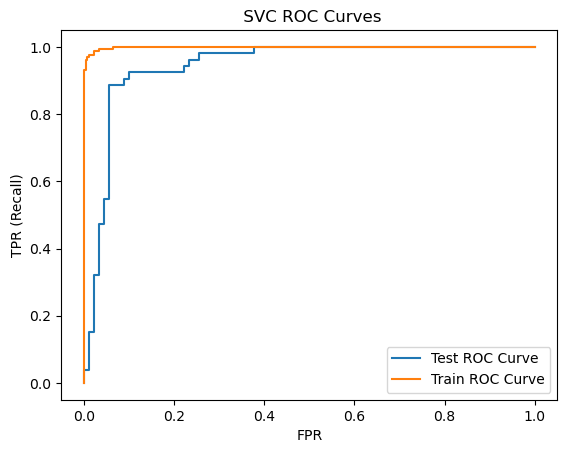

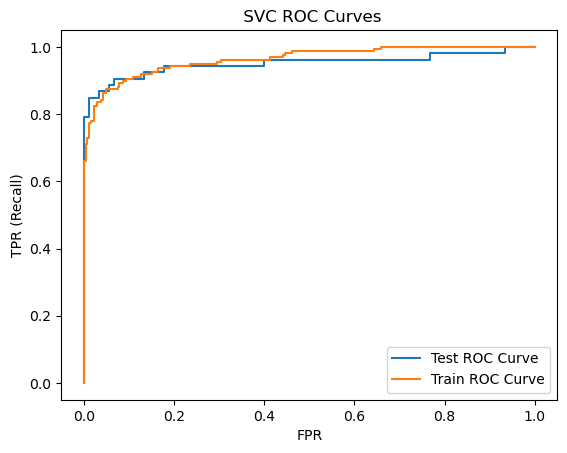

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# SVC

# Prueba 
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, best_svc_model.decision_function(X_test))
plt.plot(fpr_test, tpr_test, label="Test ROC Curve")

# Entrenamiento
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, best_svc_model.decision_function(X_train))
plt.plot(fpr_train, tpr_train, label="Train ROC Curve")

plt.xlabel("FPR")
plt.ylabel("TPR (Recall)")
plt.title(" SVC ROC Curves")
plt.legend()
plt.show()


# SDG

# Prueba 
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, best_sdg_model.decision_function(X_test))
plt.plot(fpr_test, tpr_test, label="Test ROC Curve")

# Entrenamiento
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, best_sdg_model.decision_function(X_train))
plt.plot(fpr_train, tpr_train, label="Train ROC Curve")

plt.xlabel("FPR")
plt.ylabel("TPR (Recall)")
plt.title(" SVC ROC Curves")
plt.legend()
plt.show()


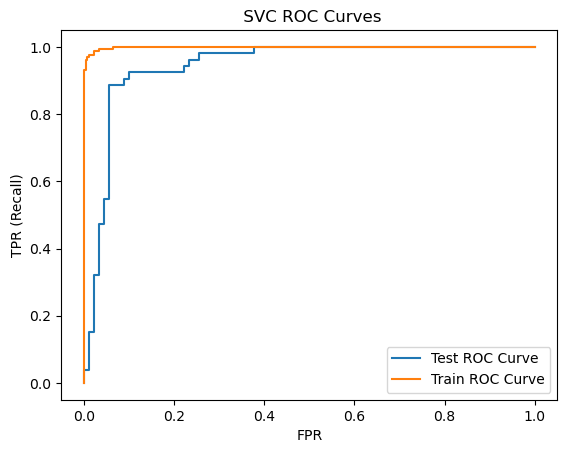

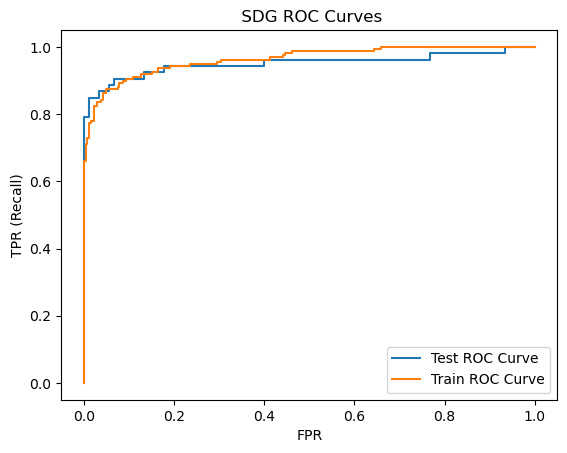

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# SVC

# Prueba 
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, best_svc_model.decision_function(X_test))
plt.plot(fpr_test, tpr_test, label="Test ROC Curve")

# Entrenamiento
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, best_svc_model.decision_function(X_train))
plt.plot(fpr_train, tpr_train, label="Train ROC Curve")

plt.xlabel("FPR")
plt.ylabel("TPR (Recall)")
plt.title(" SVC ROC Curves")
plt.legend()
plt.show()


# SDG

# Prueba 
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, best_sdg_model.decision_function(X_test))
plt.plot(fpr_test, tpr_test, label="Test ROC Curve")

# Entrenamiento
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, best_sdg_model.decision_function(X_train))
plt.plot(fpr_train, tpr_train, label="Train ROC Curve")

plt.xlabel("FPR")
plt.ylabel("TPR (Recall)")
plt.title(" SDG ROC Curves")
plt.legend()
plt.show()

Lo que buscamos con la curva ROC es el punto donde más cerca se esté de la esquina superior izquierda (queremos un recall alto y un FPR bajo, ya que este será el que mejor clasificación tendrá.

Podemos ver en la siguiente celda los rendimiento del average_precision_score, en este caso aunque SVC en entrenamiento tenga un rendimiento mejor, en la media es mejor SDG con un 95% de rendimiento

In [29]:
from sklearn.metrics import average_precision_score

#SVC
y_score = best_svc_model.decision_function(X_test)
average_precision_svc = average_precision_score(y_test, y_score)

print(f"Average Precision Score-SVC: {average_precision_svc}")

#SDG
y_score = best_sdg_model.decision_function(X_test)
average_precision_sdg = average_precision_score(y_test, y_score)

print(f"Average Precision Score-SDG: {average_precision_sdg}")


Average Precision Score-SVC: 0.8603747098979401
Average Precision Score-SDG: 0.9552546537771931


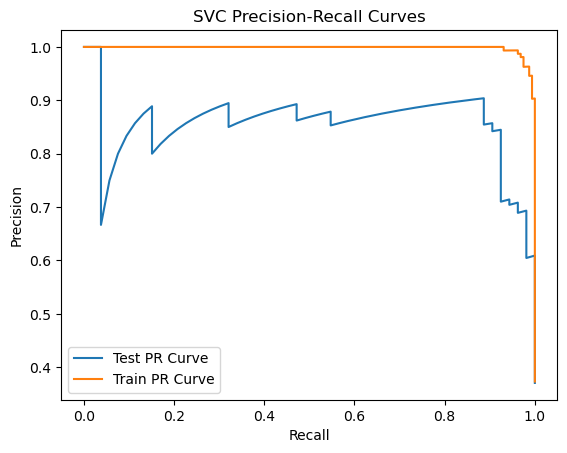

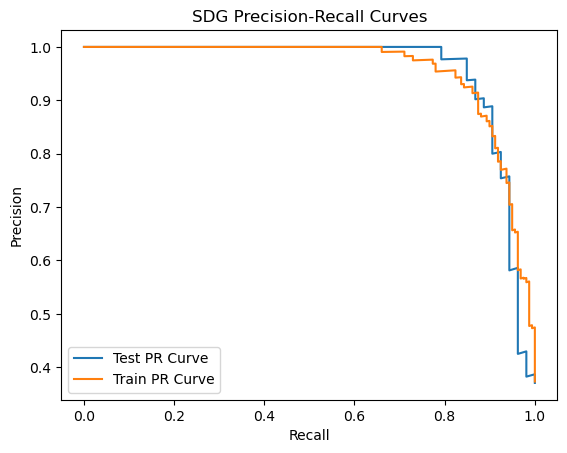

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

# SVC
# Prueba 
precision_test, recall_test, thresholds_test = precision_recall_curve(y_test, best_svc_model.decision_function(X_test))
auc_pr_test = auc(recall_test, precision_test)
plt.plot(recall_test, precision_test, label="Test PR Curve")

# Entrenamiento
precision_train, recall_train, thresholds_train = precision_recall_curve(y_train, best_svc_model.decision_function(X_train))
auc_pr_train = auc(recall_train, precision_train)
plt.plot(recall_train, precision_train,label="Train PR Curve")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("SVC Precision-Recall Curves")
plt.legend()
plt.show()


# SDG
# Prueba 
precision_test, recall_test, thresholds_test = precision_recall_curve(y_test, best_sdg_model.decision_function(X_test))
auc_pr_test = auc(recall_test, precision_test)
plt.plot(recall_test, precision_test, label="Test PR Curve")

# Entrenamiento
precision_train, recall_train, thresholds_train = precision_recall_curve(y_train, best_sdg_model.decision_function(X_train))
auc_pr_train = auc(recall_train, precision_train)
plt.plot(recall_train, precision_train,label="Train PR Curve")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("SDG Precision-Recall Curves")
plt.legend()
plt.show()

Con la curva PR lo que buscamos es encontrar el valor donde más nos acercamos al extremo superior derecho, ya que cuantos más nos acerquemos a esta zona , menor número de falsos positivos y negativos habrá.

En el caso del modelo SVC podemos ver que la curva de test es muy irregular con respecto a las demás, esto quizás se deba a la sensibilidad de los umbrales o también al tamaño del conjunto de test que es pequeño.

In [31]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, best_sdg_model.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, best_svc_model.decision_function(X_test))
print("AUC de SDG : {:.3f}".format(rf_auc))
print("AUC de SVC: {:.3f}".format(svc_auc))

AUC de SDG : 0.906
AUC de SVC: 0.944


# Bibliografía

https://www.hackerearth.com/blog/developers/simple-tutorial-svm-parameter-tuning-python-r/

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

https://qu4nt.github.io/sklearn-doc-es/modules/generated/sklearn.linear_model.SGDClassifier.html